# Phase 1 Project: Aviation Risk Analysis

## Introduction
In this project, I will use basic principles of phase 1 to develop insights for a business stakeholder

## Objective
 
in this project i should have been able to do the following:
- Show basic understanding of phase 1 concepts that range from the use of git operations and bash commands
- Showing understanding and application of data analysis in base python
- Show clear knowledgeof using pandas library in data analysis and data cleaning

The following steps will be taken into account throught this project:
1) Step 1: Data understanding and preprocessing
2) Step 2: Data exploration andfeature engineering
3) Step 3: Data analysis

# Step 1:Data understanding and feature engineering
 In this section we will be focussed on:
 - Loading data
 - inspecting the data (searching for missing data, duplicates and inconsistencies)
 - Handling missing data, removing duplicates and correcting any and al inconsistencies

## Loading the data

First we will be importing any necessary libraries that we might end up using

In [126]:
#import all relevant libraries that could be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

Next we will be loading the data that we will be using

In this case we will be using:
1. `AviationData.csv`: which contains the NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters which will be loaded into 
2. `USState_Codes.csv`: which contains the US State name and the abbreviation of them

Below we will be loading the data from `AviationData.csv` into the container `avida` and then diaplay the first few columns of the dataset 

In [2]:
avida= pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
avida.head()

C:\Users\User\AppData\Local\Temp\ipykernel_18364\1982866989.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  avida= pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Next we load the state codes from `USState_Codes.csv` into the container `staco` and display a preiview of it

In [3]:
staco= pd.read_csv('USState_Codes.csv',encoding='ISO-8859-1')
staco.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## Inspection of Data

Here we will be looking at the missing data values, duplicate records and handling them accordingly

In [4]:
#Let's look at the shape of avida
avida.shape

(88889, 31)

In [5]:
#Then we inspect the information on avida
avida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Now from the information above it is clear to say that there are missing values in the data set which we can further breakdown and look at each pf them per column and how many data values are missing per column

In [7]:
avida.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

From the above we can paint a cleare picture of the rows that are missing key ddata in order for us to analyse this dataset. Now there are several ways in which we can go about handling them:

1) The first method is by removing rows/columns that have missing values from the data set. However, it is keen to note that if we are going to remove the missing values from the data set we should be careful as to not remove more than 3/4 of the data since this could lead to a misinterpretation of the data set

2) The second method is by replacing rows/columns that have missing values which will be represented by 'NaN in the dataset' with a string `Nan`

3) Lasly we can fill the missing values with a numerical value (0) as a way of showing that there is no value for that column

## Data Cleaning

### Solution to our problem of missing data/ duplicate records

Now in our case the best case scenario would be to raplace the missing values with a number that would imply that the information is not given and this should be considered as a problem especially in cases where we are looking at `Injury_severity` or maybe even `Total.Fatal.Injuries` as they show how catastrophic the crash was. This is so that it would help with aggregation functions when we try to group data later on.

In the cell below we would be doing exactly that, replacing all missing values with a numerical value representing the data missing

In [56]:
avida.fillna(0)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,0,0,0,0,...,Personal,0,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,0,0,0,0,...,Personal,0,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,0,0,...,Personal,0,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,0,0,0,0,...,Personal,0,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,0,0,0,0,...,Personal,0,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,0,0,0,0,...,Personal,0,0.0,1.0,0.0,0.0,0,0,0,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,0,0.0,0.0,0.0,1.0,VMC,0,0,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,0,0,0,0,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,0,0,0,0


Now in the cell below we will be checking if there is still any missing values left after filling the missing values with a numerical value (0) to indicate that they are missing.

In [54]:
avida.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Now since we have been able to handle missing values and are sure that every column doesn't have any missing value next we will be looking for any duplicated values in the cell below

In [11]:
avida.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [12]:
avida.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Step 2: Data exploration ad Deature engineering

In this step we will  be attempting to explore key features e.g. weather conditions, aircraft types etc. Lastly, we will also be looking to create new features that will help with the analysis for instance accident rate per aircraft type

In [13]:
#In this cell we will be displaying relevant aircraft inforamtion like the category and the number in each category
aircraft = avida['Aircraft.Category'].value_counts()
aircraft 

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [14]:
#Look at the amount of damage occuring after an accident
damage = avida['Aircraft.damage'].value_counts()
damage

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

In [15]:
#creat a list of at what point during the flights the accidents occur
flight_type = avida['Broad.phase.of.flight'].value_counts()
flight_type

Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [33]:
#Let's look at the types of damage and how many the are
air_craft_damage = avida['Aircraft.damage'].value_counts()
air_craft_damage

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

# Step 3: Data Analysis

There are three main data analyses types that we will be looking at in this section:
1) Descriptive analysis:  Get a sum of the data to get an overall picture of the data e.g. overall accident rates for different aircraft types
2) Comparative analysis: We'll look at graphical represantins that give us the differences in accident rates 

##  Descriptive analysis

Let's try and sum up some different samles of the data

In [98]:
#Here we'll be looking at the aircraft category and the accidents that occured
b = avida.drop(avida.columns[0:4],axis = 1)
b = b.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity','Aircraft.damage','Make','Model',  'Registration.Number', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'FAR.Description', 'Schedule','Purpose.of.flight','Air.carrier','Weather.Condition','Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],axis = 1) 
classification_of_injuries_by_purpose_of_flight = b.groupby('Aircraft.Category').sum()
classification_of_injuries_by_purpose_of_flight

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.Category,,,,
Airplane,16029.0,7262.0,6286.0,170111.0
Balloon,43.0,186.0,185.0,842.0
Blimp,0.0,0.0,3.0,4.0
Glider,99.0,113.0,112.0,337.0
Gyrocraft,44.0,55.0,30.0,84.0
Helicopter,1778.0,1040.0,892.0,3873.0
Powered Parachute,15.0,40.0,73.0,23.0
Powered-Lift,0.0,1.0,0.0,2.0
Rocket,1.0,0.0,1.0,0.0


In [139]:
#Here we'll be looking at the aircraft category and the number of fatal injuries
b1 = avida.drop(avida.columns[0:4],axis = 1)
b1 = b1.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_fatal_injuries_by_aircraft = b1.groupby('Aircraft.Category')['Total.Fatal.Injuries'].sum()
classification_of_fatal_injuries_by_aircraft

Aircraft.Category
Airplane             16029.0
Balloon                 43.0
Blimp                    0.0
Glider                  99.0
Gyrocraft               44.0
Helicopter            1778.0
Powered Parachute       15.0
Powered-Lift             0.0
Rocket                   1.0
ULTR                     0.0
UNK                      0.0
Ultralight              10.0
Unknown                 16.0
WSFT                    10.0
Weight-Shift            67.0
Name: Total.Fatal.Injuries, dtype: float64

In [137]:
#Here we'll be looking at the aircraft category and the number of serious injuries
b2 = avida.drop(avida.columns[0:4],axis = 1)
b2 = b2.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_injuries_by_purpose_of_flight = b2.groupby('Aircraft.Category').sum()
classification_of_injuries_by_purpose_of_flight

,Total.Serious.Injuries
Aircraft.Category,
Airplane,7262.0
Balloon,186.0
Blimp,0.0
Glider,113.0
Gyrocraft,55.0
Helicopter,1040.0
Powered Parachute,40.0
Powered-Lift,1.0
Rocket,0.0


In [110]:
#Here we'll be looking at the aircraft category and the number of minor injuries
b3 = avida.drop(avida.columns[0:4],axis = 1)
b3 = b3.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_injuries_by_purpose_of_flight = b3.groupby('Aircraft.Category').sum()
classification_of_injuries_by_purpose_of_flight

,Total.Minor.Injuries
Aircraft.Category,
Airplane,6286.0
Balloon,185.0
Blimp,3.0
Glider,112.0
Gyrocraft,30.0
Helicopter,892.0
Powered Parachute,73.0
Powered-Lift,0.0
Rocket,1.0


In [120]:
#Here we'll be looking at the aircraft category and the total uninjured
b4 = avida.drop(avida.columns[0:4],axis = 1)
b4 = b4.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_uninjured_by_aircraft_type = b4.groupby('Aircraft.Category')['Total.Uninjured'].sum()
classification_of_injuries_by_purpose_of_flight

Aircraft.Category
Airplane             170111.0
Balloon                 842.0
Blimp                     4.0
Glider                  337.0
Gyrocraft                84.0
Helicopter             3873.0
Powered Parachute        23.0
Powered-Lift              2.0
Rocket                    0.0
ULTR                      0.0
UNK                       0.0
Ultralight               10.0
Unknown                  18.0
WSFT                      1.0
Weight-Shift             47.0
Name: Total.Uninjured, dtype: float64

Now let's try and getting a clearer picture of the accidents that occur from different factors

In [65]:
#Here we'll be looking at the aircraft type and the reason for flight and accidents that occured
d = avida.drop(avida.columns[0:4],axis = 1)
d = d.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity','Aircraft.damage','Make','Model',  'Registration.Number', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'FAR.Description', 'Schedule','Air.carrier','Weather.Condition','Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],axis = 1) 
classification_of_injuries_by_purpose_of_flight = d.groupby(['Aircraft.Category', 'Purpose.of.flight']).sum()
classification_of_injuries_by_purpose_of_flight

Total.Fatal.Injuries  \
Aircraft.Category Purpose.of.flight                          
Airplane          ASHO                                14.0   
                  Aerial Application                 154.0   
                  Aerial Observation                 105.0   
                  Air Drop                             0.0   
                  Air Race show                       35.0   
...                                                    ...   
WSFT              Unknown                              1.0   
Weight-Shift      Air Race show                        1.0   
                  Flight Test                          0.0   
                  Instructional                       11.0   
                  Personal                            55.0   

                                      Total.Serious.Injuries  \
Aircraft.Category Purpose.of.flight                            
Airplane          ASHO                                   1.0   
                  Aerial Application                   167.0   
                  Aerial Observation                    59.0   
                  Air Drop                               2.0   
                  Air Race show                         10.0   
...                                                      ...   
WSFT              Unknown                                0.0   
Weight-Shift      Air Race show                          0.0   
                  Flight Test                            0.0   
                  Instructional                         14.0   
                  Personal                              44.0   

                                      Total.Minor.Injuries  Total.Uninjured  
Aircraft.Category Purpose.of.flight                                          
Airplane          ASHO                                 0.0              1.0  
                  Aerial Application                 131.0            639.0  
                  Aerial Observation                  33.0            135.0  
                  Air Drop                             0.0              3.0  
                  Air Race show                        9.0             46.0  
...                                                    ...              ...  
WSFT              Unknown                              0.0              0.0  
Weight-Shift      Air Race show                        0.0              0.0  
                  Flight Test                          1.0              0.0  
                  Instructional                        8.0             13.0  
                  Personal                            40.0             34.0  

[96 rows x 4 columns]

In [77]:
#Here we'll classify the data by looking at the make of the aircraft and aggreagte of all injury types
a = avida.drop(avida.columns[0:4],axis = 1)
a = a.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity','Aircraft.damage','Model',  'Registration.Number', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'FAR.Description', 'Schedule','Purpose.of.flight','Air.carrier','Weather.Condition','Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],axis = 1) 
classification_of_injuries_by_make_of_aircraft = a.groupby(['Aircraft.Category', 'Make']).sum()
classification_of_injuries_by_make_of_aircraft

Total.Fatal.Injuries  \
Aircraft.Category Make                                        
Airplane          177MF LLC                             0.0   
                  2007 Savage Air LLC                   0.0   
                  2021FX3 LLC                           0.0   
                  3XTRIM                                1.0   
                  5 RIVERS LLC                          0.0   
...                                                     ...   
Weight-Shift      Top Dog                               1.0   
                  Trick Trikes                          1.0   
                  Tukan                                 1.0   
                  UNKNOWN                               0.0   
                  Venus                                 0.0   

                                       Total.Serious.Injuries  \
Aircraft.Category Make                                          
Airplane          177MF LLC                               2.0   
                  2007 Savage Air LLC                     0.0   
                  2021FX3 LLC                             0.0   
                  3XTRIM                                  0.0   
                  5 RIVERS LLC                            0.0   
...                                                       ...   
Weight-Shift      Top Dog                                 0.0   
                  Trick Trikes                            3.0   
                  Tukan                                   0.0   
                  UNKNOWN                                 0.0   
                  Venus                                   2.0   

                                       Total.Minor.Injuries  Total.Uninjured  
Aircraft.Category Make                                                        
Airplane          177MF LLC                             0.0              0.0  
                  2007 Savage Air LLC                   0.0              4.0  
                  2021FX3 LLC                           0.0              4.0  
                  3XTRIM                                1.0              0.0  
                  5 RIVERS LLC                          1.0              1.0  
...                                                     ...              ...  
Weight-Shift      Top Dog                               0.0              0.0  
                  Trick Trikes                          0.0              0.0  
                  Tukan                                 0.0              0.0  
                  UNKNOWN                               0.0              2.0  
                  Venus                                 0.0              0.0  

[4777 rows x 4 columns]

In [78]:
#We are classifying the data with repsect to weather condition of the flight and all the injury types
c = avida.drop(avida.columns[0:4],axis = 1)
c = c.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity','Aircraft.damage','Make','Model',  'Registration.Number', 'Amateur.Built', 'Number.of.Engines','Engine.Type', 'FAR.Description', 'Schedule','Purpose.of.flight','Air.carrier','Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],axis = 1) 
classification_of_injuries_by_weather = c.groupby(['Aircraft.Category', 'Weather.Condition']).sum()
classification_of_injuries_by_weather

Total.Fatal.Injuries  \
Aircraft.Category Weather.Condition                         
Airplane          IMC                              2835.0   
                  UNK                               384.0   
                  Unk                               243.0   
                  VMC                              6371.0   
Balloon           IMC                                18.0   
                  Unk                                 0.0   
                  VMC                                20.0   
Blimp             VMC                                 0.0   
Glider            IMC                                 1.0   
                  UNK                                 1.0   
                  Unk                                 1.0   
                  VMC                                89.0   
Gyrocraft         IMC                                 0.0   
                  VMC                                43.0   
Helicopter        IMC                               214.0   
                  UNK                                19.0   
                  Unk                                82.0   
                  VMC                               818.0   
Powered Parachute VMC                                14.0   
Powered-Lift      VMC                                 0.0   
Rocket            VMC                                 1.0   
ULTR              VMC                                 0.0   
Ultralight        IMC                                 0.0   
                  VMC                                 5.0   
Unknown           VMC                                 2.0   
WSFT              VMC                                 9.0   
Weight-Shift      IMC                                 3.0   
                  VMC                                64.0   

                                     Total.Serious.Injuries  \
Aircraft.Category Weather.Condition                           
Airplane          IMC                                 432.0   
                  UNK                                  25.0   
                  Unk                                 128.0   
                  VMC                                5720.0   
Balloon           IMC                                   0.0   
                  Unk                                   0.0   
                  VMC                                 181.0   
Blimp             VMC                                   0.0   
Glider            IMC                                   0.0   
                  UNK                                   0.0   
                  Unk                                   0.0   
                  VMC                                 109.0   
Gyrocraft         IMC                                   2.0   
                  VMC                                  52.0   
Helicopter        IMC                                  26.0   
                  UNK                                   8.0   
                  Unk                                   3.0   
                  VMC                                 873.0   
Powered Parachute VMC                                  40.0   
Powered-Lift      VMC                                   1.0   
Rocket            VMC                                   0.0   
ULTR              VMC                                   0.0   
Ultralight        IMC                                   0.0   
                  VMC                                  11.0   
Unknown           VMC                                   3.0   
WSFT              VMC                                   1.0   
Weight-Shift      IMC                                   0.0   
                  VMC                                  58.0   

                                     Total.Minor.Injuries  Total.Uninjured  
Aircraft.Category Weather.Condition                                         
Airplane          IMC                               768.0          11182.0  
                  UNK                               302.0           3960.0  
       

In [149]:
z = avida.drop(avida.columns[0:4],axis = 1)
z = z.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Air.carrier','Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
fatalities_according_to_weather_and_purpose_of_flight = z.groupby(['Weather.Condition','Purpose.of.flight'])['Total.Fatal.Injuries'].sum()
fatalities_according_to_weather_and_purpose_of_flight_reset = fatalities_according_to_weather_and_purpose_of_flight.reset_index()
fatalities_according_to_weather_and_purpose_of_flight


Weather.Condition  Purpose.of.flight        
IMC                Aerial Application             13.0
                   Aerial Observation             28.0
                   Air Race show                   2.0
                   Business                      905.0
                   Executive/corporate           292.0
                                                 ...  
VMC                Public Aircraft - Federal      40.0
                   Public Aircraft - Local        13.0
                   Public Aircraft - State        12.0
                   Skydiving                     228.0
                   Unknown                      4539.0
Name: Total.Fatal.Injuries, Length: 67, dtype: float64

In [151]:
j = avida.drop(avida.columns[0:4],axis = 1)
j = j.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage','Aircraft.Category', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Purpose.of.flight', 'Air.carrier','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_fatal_injuries_by_weather = j.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
classification_of_fatal_injuries_by_weather

Weather.Condition
IMC    11824.0
UNK     2407.0
Unk      326.0
VMC    25558.0
Name: Total.Fatal.Injuries, dtype: float64

In [153]:
w = avida.drop(avida.columns[0:4],axis = 1)
w = w.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage','Aircraft.Category', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Air.carrier','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_fatal_injuries_by_purpose = w.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum()
classification_of_fatal_injuries_by_purpose

Purpose.of.flight
ASHO                            14.0
Aerial Application             549.0
Aerial Observation             414.0
Air Drop                        10.0
Air Race show                   42.0
Air Race/show                   34.0
Banner Tow                      19.0
Business                      2313.0
Executive/corporate            598.0
External Load                   39.0
Ferry                          386.0
Firefighting                    37.0
Flight Test                    130.0
Glider Tow                      16.0
Instructional                 1913.0
Other Work Use                 511.0
PUBL                             0.0
PUBS                             0.0
Personal                     18762.0
Positioning                    635.0
Public Aircraft                406.0
Public Aircraft - Federal       41.0
Public Aircraft - Local         13.0
Public Aircraft - State         23.0
Skydiving                      234.0
Unknown                       9789.0
Name: Total.Fatal.In

In [169]:
t = avida.drop(avida.columns[0:4],axis = 1)
t = t.drop(columns=['Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description','Schedule', 'Air.carrier','Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition','Weather.Condition', 'Broad.phase.of.flight', 'Report.Status','Publication.Date'],axis = 1) 
classification_of_aircrafts_by_purpose = t.groupby(['Aircraft.Category', 'Purpose.of.flight']).size().reset_index(name='Counts')
classification_of_aircrafts_by_purpose

,Aircraft.Category,Purpose.of.flight,Counts
0,Airplane,ASHO,6
1,Airplane,Aerial Application,1068
2,Airplane,Aerial Observation,170
3,Airplane,Air Drop,3
4,Airplane,Air Race show,74
...,...,...,...
91,WSFT,Unknown,1
92,Weight-Shift,Air Race show,1
93,Weight-Shift,Flight Test,1
94,Weight-Shift,Instructional,26


## Comparative Analysis

Here we are going to be looking at the various factors and compare the fatality rates among those factors

From the above we can paint a cleare picture of the rows that are missing key ddata in order for us to analyse this dataset. Now there are several ways in which we can go about handling them:

1) The first method is by removing rows/columns that have missing values from the data set. However, it is keen to note that if we are going to remove the missing values from the data set we should be careful as to not remove more than 3/4 of the data since this could lead to a misinterpretation of the data set

2) The second method is by replacing rows/columns that have missing values which will be represented by 'NaN in the dataset' with a string `Nan`

Text(0, 0.5, 'Total Fatal Injuries')

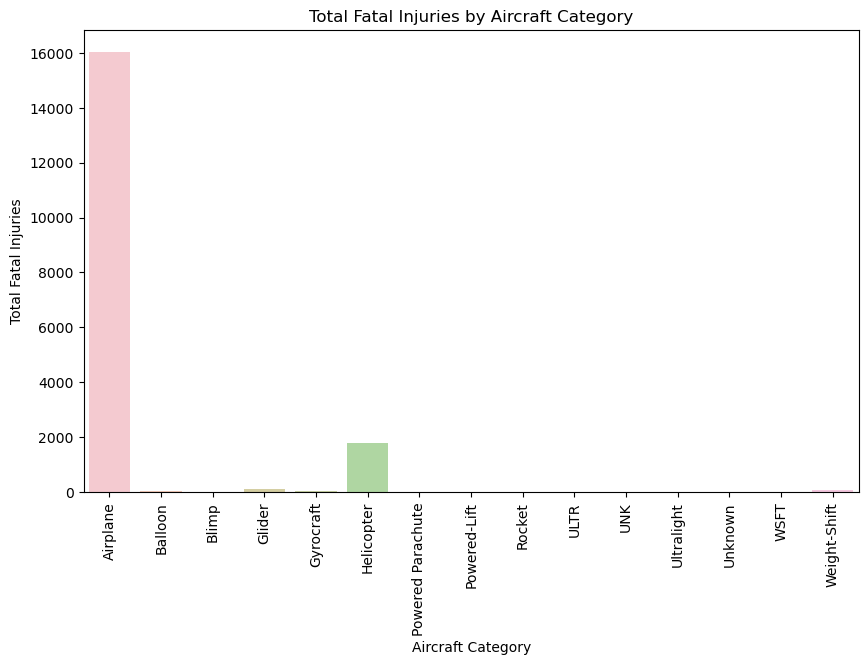

In [157]:
#Now lets plot a graph of the aircraft category and the total fatal injuries
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_of_fatal_injuries_by_aircraft.index, y=classification_of_fatal_injuries_by_aircraft.values, alpha=0.5)


plt.xticks(rotation=90)
plt.title('Total Fatal Injuries by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Fatal Injuries')

Text(0, 0.5, 'Total Fatal Injuries')

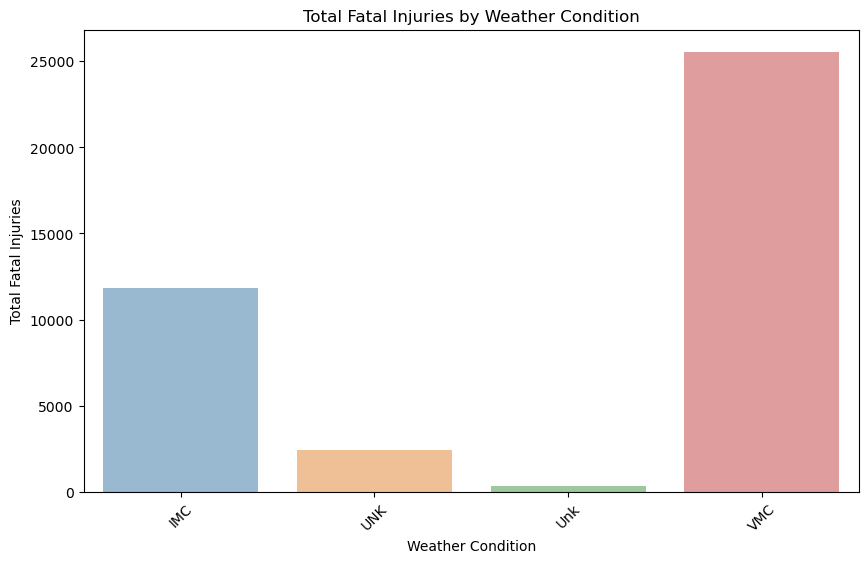

In [154]:
#Now lets plot a graph of the weather conditions and the total fatal injuries
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_of_fatal_injuries_by_weather.index, y=classification_of_fatal_injuries_by_weather.values, alpha=0.5)


plt.xticks(rotation=45)
plt.title('Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')

Text(0, 0.5, 'Total Fatal Injuries')

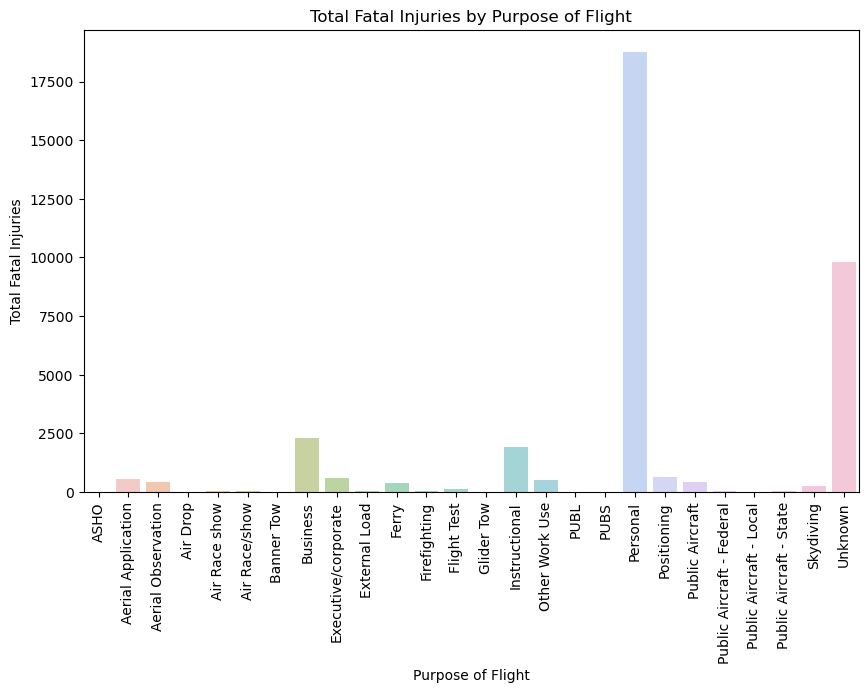

In [156]:
#Now lets plot a graph of the Purpose of flight and the total fatal injuries
plt.figure(figsize=(10, 6))
sns.barplot(x=classification_of_fatal_injuries_by_purpose.index, y=classification_of_fatal_injuries_by_purpose.values, alpha=0.5)


plt.xticks(rotation=90)
plt.title('Total Fatal Injuries by Purpose of Flight')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')

Now we have seen the outcome and how the various factors all relat to one another now let's see the final conclusions

# Conclusions

1) We will draw our first conclusion from the first graph where we are looking at the fatalities accross each type of available aircraft. Now it is keen to note that the most fatlities occur when the type of aircraft being used is an airolane. This is rightfully so since they are the ones that carry the most ammount of people and are the most common tpye of airplanes in service. However, this does mean that they have the highest risk since even though they have potential to bring in the most revenue

2) The second observation is that since the most amount fatalities occur in airplanes and the most cause of fatalities in reason for flight is personal, we can deduce that the most number of fatalitities that occur are in airplane where people are using then for personal use

3) To sum it all up, it is clear that the most common cause of fatalities might end up having the most risk it is also keen to note that it is due to the high volume of traffic that it has

# Recommendation

It is of great advice that the company depending on it's motive for expansion be cationed that the most profitable venture in the aircraft industry, which is the airplane since it is majorly used for personal reasons, might also be the most profitable to due to the amount of customers it potentially might end up having